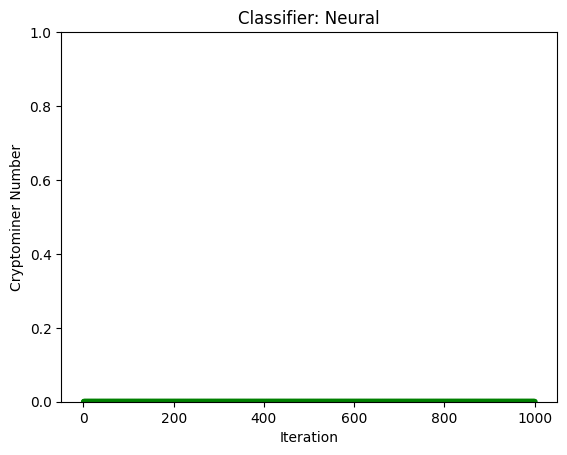

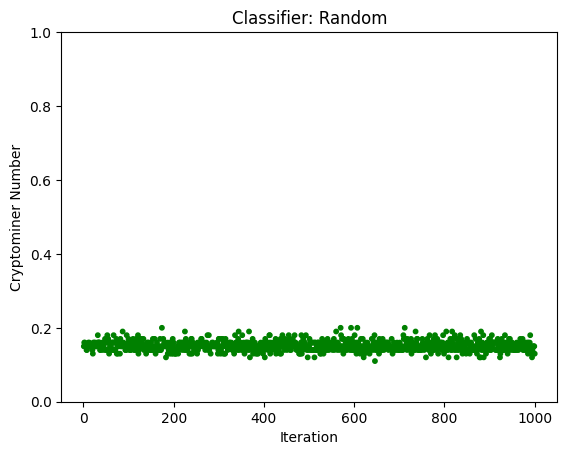

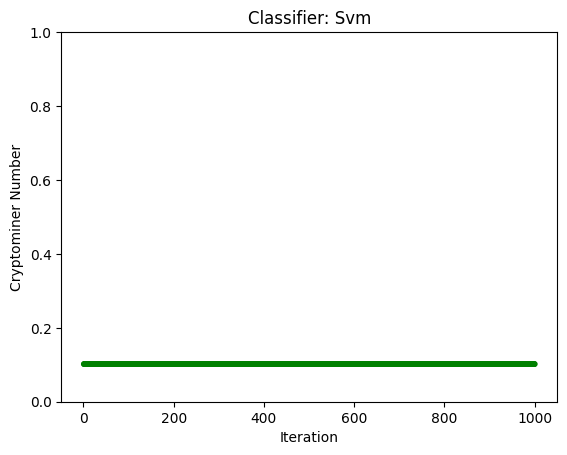

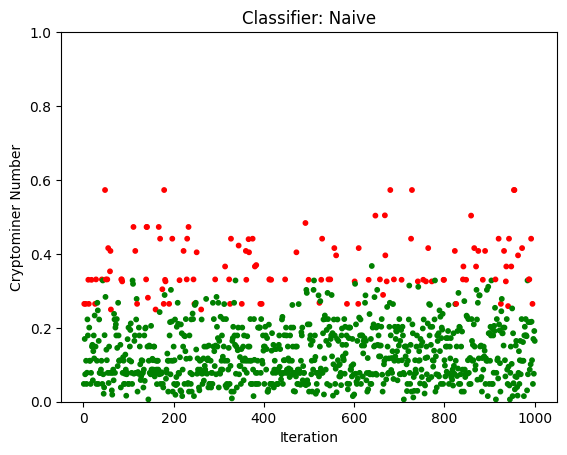

In [19]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
with open("data/unopt/wasm-mutate.json", "r") as file:
    data = json.load(file)

# Filter the entries with the name "needleman_wunsch"
needleman_wunsch_data = [entry for entry in data if entry["name"] == "needleman_wunsch"]

classifiers = ["neural", "random", "svm", "naive"]

for classifier in classifiers:
    # Prepare the data for the plot
    iterations = []
    cryptominer_numbers = []
    colors = []

    for entry in needleman_wunsch_data:
        iteration = entry["iteration"]
        classifier_results = entry["wasim"]["result"][classifier]
        cryptominer_number = classifier_results["Cryptominer"]

        iterations.append(iteration)
        cryptominer_numbers.append(cryptominer_number)

        # Check if the cryptominer number is the largest in the list
        max_value_key = max(classifier_results, key=lambda x: classifier_results[x] if x != "code" else -1)
        color = "red" if max_value_key == "Cryptominer" else "green"
        colors.append(color)

    # Create the plot
    plt.figure()
    plt.scatter(iterations, cryptominer_numbers, c=colors, s=10)
    plt.xlabel("Iteration")
    plt.ylabel("Cryptominer probability")
    plt.title(f"Classifier: {classifier.capitalize()}")
    plt.ylim(0, 1)

plt.show()

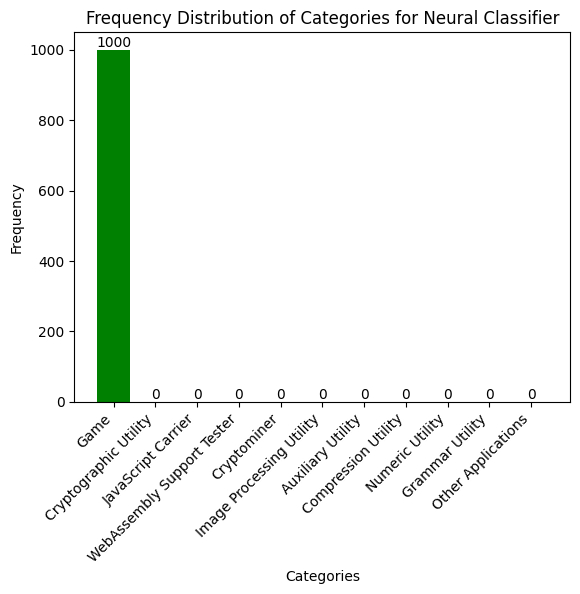

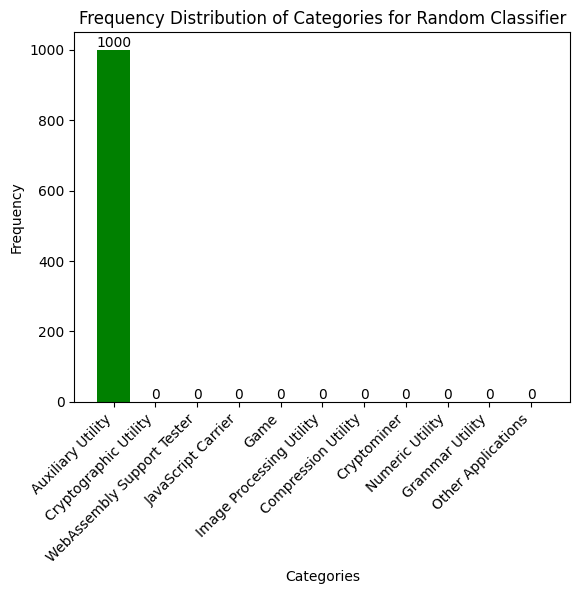

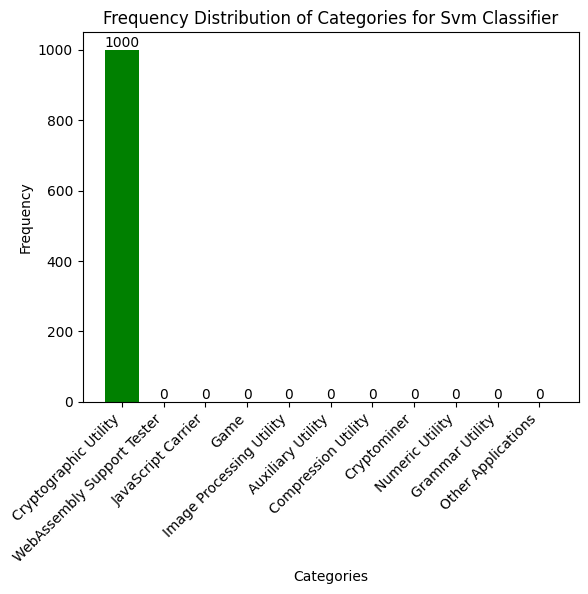

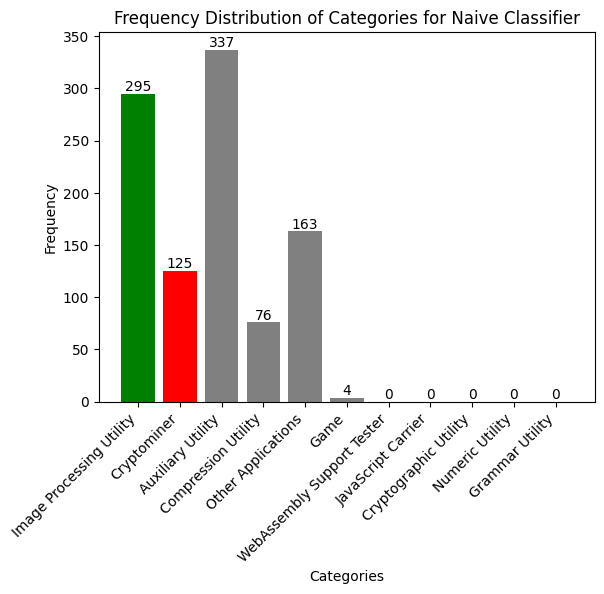

In [22]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Load the original classification data
with open("data/unopt/unobfuscated.json", "r") as file:
    original_data = json.load(file)

# Load the mutated classification data
with open("data/unopt/wasm-mutate.json", "r") as file:
    mutated_data = json.load(file)

classifiers = ["neural", "random", "svm", "naive"]

def count_keys_for_classifier(classifier):
    key_counts = defaultdict(int)
    
    for entry in mutated_data:
        if entry["name"] == "needleman_wunsch":
            classifier_results = entry["wasim"]["result"][classifier]
            max_value_key = max(classifier_results, key=lambda x: classifier_results[x] if x != "code" else -1)
            key_counts[max_value_key] += 1
            
    return key_counts

# Find the correct key for the original data
original_keys = {}
for classifier in classifiers:
    for entry in original_data:
        if entry["name"] == "needleman_wunsch":
            classifier_results = entry["wasim"]["result"][classifier]
            original_key = max(classifier_results, key=lambda x: classifier_results[x] if x != "code" else -1)
            original_keys[classifier] = original_key
            break

# Plot the bar graph for each classifier
for idx, classifier in enumerate(classifiers):
    key_counts = count_keys_for_classifier(classifier)
    
    # Ensure all keys are present, even if their values are 0
    all_keys = set()
    for entry in mutated_data:
        if entry["name"] == "needleman_wunsch":
            all_keys.update(entry["wasim"]["result"][classifier].keys())
    all_keys.remove("code")
    
    for key in all_keys:
        if key not in key_counts:
            key_counts[key] = 0

    # Create a list of bar colors based on the original classification data
    bar_colors = ["red" if key == "Cryptominer" else "green" if key == original_keys[classifier] else "gray" for key in key_counts]
    
    keys = list(key_counts.keys())
    values = list(key_counts.values())
    
    plt.figure(idx)
    bars = plt.bar(keys, values, color=bar_colors)
    plt.xlabel("Categories")
    plt.ylabel("Frequency")
    plt.title(f"Frequency Distribution of Categories for {classifier.capitalize()} Classifier")
    plt.xticks(rotation=45, ha="right")  # Angle the category labels to avoid overlapping

    # Display count for each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha="center", va="bottom")
    
plt.show()


